### Testing recov

In [15]:
from mil_models import TransMIL_peg
from pandas_dataloader import Pandas_Dataset
from train_mil import preprocess_data,train_full,val_one_epoch,collate
# import argparse
from pathlib import Path
import torch
import time
import torchmetrics
import pandas as pd
import numpy as np

class args_parse:
    def __init__(self,**kwargs):
        self.__dict__.update(kwargs)

args = args_parse(seed=1,
                  data_root_dir='/localdisk3/ramanav/TCGA_processed/PANDAS_MIL_Patches_Ctrans_1MPP/',
                  csv_path='/aippmdata/public/PANDAS',
                  save_dir='/home/ramanav/Projects/ReCoV/results/pandas',
                  num_classes=6,
                  batch_size=128,
                  lr=2e-4,
                  lamda=0.0005,
                  patience=10,
                  num_epochs=20,
                  n_folds=5,
                #   model_name="15Dec_09_26_56_20_2.5_s1_[1, 1, 0]",
                  # model_name="20Dec_15_47_06_20_2.5_s1_[0, 0, 0, 1]_0",
                  model_name = "20Dec_16_02_12_20_1.0_s1_[0, 0, 0, 1]_1",
                  exclusion=True)

MODEL_NAME = args.model_name
ROOT_PATH = Path(args.save_dir)
EXCLUSION = args.exclusion
THRESHOLD = 0.4
DEVICE = torch.device(f"cuda:0" if torch.cuda.is_available() else "cpu")
timestamp = time.strftime("_%d%b_%H_%M_%S", time.gmtime())

#model defination
model = TransMIL_peg(n_classes=6)

#Prepare data
(X_train_clean,y_train_clean),(X_val_clean,y_val_clean),(X_test_clean,y_test_clean), _ = preprocess_data(args)
X_train_clean["isup_grade"] = y_train_clean
train_split = X_train_clean.reset_index(drop=True)
X_val_clean["isup_grade"] = y_val_clean
val_split = X_val_clean.reset_index(drop=True)
X_test_clean["isup_grade"] = y_test_clean
# train_split = pd.concat((X_train_clean,X_val_clean))
# train_split = train_split.sort_values(by="image_id").reset_index(drop=True)
# train_split["int_id"] = train_split.index
test_split = X_test_clean.reset_index(drop=True)


metricfunc = torchmetrics.MetricCollection([torchmetrics.Accuracy(num_classes=args.num_classes,average=None),
                                        torchmetrics.F1Score(num_classes=args.num_classes,average='weighted'),
                                        ])

testmetricdict = metricfunc.clone(prefix='test_').to(DEVICE)

KeyboardInterrupt: 

In [5]:
train_split

,int_id,image_id,data,data_provider,isup_grade
0,6817,c022687b86e4e3eac79381053480e039,"[[tensor(-0.0195), tensor(-0.0630), tensor(-0....",karolinska,1
1,1936,387c0c2633848a562d0299cb667239fd,"[[tensor(0.0177), tensor(0.1051), tensor(-0.04...",karolinska,2
2,2685,4e6e65a0d88a155afa71221ceceee985,"[[tensor(-0.0254), tensor(-0.0553), tensor(0.0...",karolinska,0
3,950,1c691c8c6fd05875e916519e1dca50a0,"[[tensor(0.0057), tensor(-0.0147), tensor(0.03...",karolinska,0
4,5749,a26721b3a8229e8e5e995f7a4a7974f8,"[[tensor(-0.0295), tensor(-0.0052), tensor(0.0...",karolinska,0
...,...,...,...,...,...
6363,7372,cf19c18868fc35dfd2628358ca4b73f1,"[[tensor(0.0092), tensor(-0.2045), tensor(-0.0...",radboud,1
6364,5302,9772f0e2dc3c38aa876aa4b6c4c85377,"[[tensor(0.0276), tensor(-0.0994), tensor(0.00...",radboud,3
6365,5747,a260fec22534be7e93d7f456ada4f452,"[[tensor(0.0906), tensor(-0.0064), tensor(0.06...",radboud,0
6366,1030,1eab1d74f5c90e353ce5f4440b502bc3,"[[tensor(0.0654), tensor(-0.1642), tensor(0.02...",radboud,2


In [7]:
val_split

,int_id,image_id,data,data_provider,isup_grade
0,4117,765b21a22c0ced4bd463ac18bca81705,"[[tensor(-0.0213), tensor(-0.0615), tensor(0.0...",karolinska,4
1,5610,9f2739434a4444b74f5cbe8888a77ea2,"[[tensor(-0.0034), tensor(-0.0002), tensor(0.0...",karolinska,3
2,4276,7adb9a199022845663b36db49852383b,"[[tensor(0.0205), tensor(-0.0106), tensor(0.05...",karolinska,2
3,791,177373821195cf33e7bc4c8bcd089a2e,"[[tensor(-0.0003), tensor(-0.0150), tensor(0.0...",karolinska,0
4,1520,2c66a2cdbbfc4bd3b96f1039ad3fa630,"[[tensor(-0.0187), tensor(0.0762), tensor(-0.0...",karolinska,5
...,...,...,...,...,...
1366,5898,a6df5267338c181ee62b42087d0e2292,"[[tensor(0.0212), tensor(-0.1841), tensor(0.09...",radboud,3
1367,3627,69240805aeb7c006dffd474b1253139f,"[[tensor(-0.0254), tensor(-0.1732), tensor(0.1...",radboud,1
1368,8767,f6b3c12a983a398bfafee0027cf523d5,"[[tensor(0.0632), tensor(-0.1299), tensor(0.11...",radboud,0
1369,3518,658be675223ffa5509203009eb7bba89,"[[tensor(-0.0378), tensor(-0.0346), tensor(-0....",radboud,3


In [2]:
# load recov data
if EXCLUSION:
    path = ROOT_PATH/f"memory__{MODEL_NAME}.npy"
    split = pd.read_csv(ROOT_PATH/f"splitsave__{MODEL_NAME}.csv")
    data = np.load(path)
    split["memory"] = data
    index_list = split.loc[split["memory"]>THRESHOLD,"image_id"].tolist()
    # train_split = train_split.loc[train_split["image_id"].isin(index_list)]
    # val_split = val_split.loc[val_split["image_id"].isin(index_list)]

In [12]:
temp = split.loc[split["memory"]<=np.percentile(split["memory"],10)].sort_values(by=["memory"])

In [14]:
np.percentile(split["memory"],10)

3.994487622692946

In [13]:
temp["isup_grade"].value_counts()

1    177
3    145
4    138
5    134
2     96
0     84
Name: isup_grade, dtype: int64

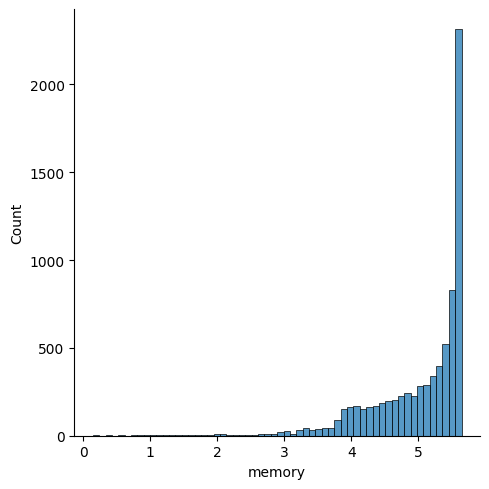

In [7]:
import seaborn as sns
sns.displot(split["memory"])

In [6]:
split["memory"].max()

5.645722269316838

### Checking initial results of recov pandas

In [1]:
import numpy as np
from pathlib import Path
import pandas as pd

In [2]:
# model_name = "14Dec_10_50_40_20_2.5_s1_[1, 1, 1]"
# model_name = "15Dec_09_26_56_20_2.5_s1_[1, 1, 0]"
# model_name = "20Dec_16_02_12_20_1.0_s1_[0, 0, 0, 1]_1"
# model_name = "20Dec_16_02_12_20_1.0_s1_[0, 0, 0, 1]_1"
model_name = "02Jan_19_37_48_20_s1_[1, 0]_1"
path = f"../results/pandas/memory__{model_name}_v2.npy"
split = pd.read_csv(f"../results/pandas/splitsave__{model_name}.csv")
data = np.load(path)
split["memory"] = data

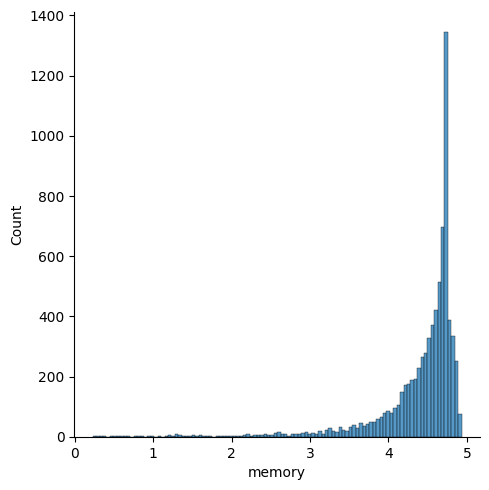

In [3]:
import seaborn as sns
sns.displot(split["memory"])

In [4]:
thresh = np.percentile(split["memory"],10)
print(f"threshold chosen: {thresh}")
split.loc[split["memory"]<=thresh].sort_values(by=["memory"])

threshold chosen: 3.8280176639556887


,int_id,image_id,data_provider,isup_grade,memory
5755,5755,bf282897514555144100efbee376bce1,radboud,5,0.228054
2694,2694,5af447057c0eb2ca945c12c398f670f9,radboud,5,0.246446
2857,2857,610489a9612f4f28cd140e8326c909fa,radboud,5,0.284508
6064,6064,c867630b14137ca898056cb4eefe1696,radboud,5,0.294955
5356,5356,b1a8dc23435d6fea4a7847fcf02f9374,radboud,5,0.310031
...,...,...,...,...,...
7174,7174,ee7a0b58f510f1f47bfc4ad434f7ddd4,karolinska,2,3.823339
439,439,0fe9a27d4af8817d43d5939344204f14,karolinska,3,3.823841
2749,2749,5d3dfae104348251b8fbc99f8d39a601,radboud,1,3.824915
1041,1041,24c1e1cef9fbcbd82978ebe7d14334cb,radboud,3,3.825022


In [12]:
split.loc[split["memory"]<=np.percentile(split["memory"],2)]["data_provider"].value_counts()

radboud       107
karolinska     48
Name: data_provider, dtype: int64

In [11]:
split.loc[split["memory"]<=np.percentile(split["memory"],2)]["isup_grade"].value_counts()

5    60
4    42
0    30
3    15
1     8
Name: isup_grade, dtype: int64

In [30]:
import torch
from mil_models import TransMIL_peg
model = torch.load("../results/pandas/03Jan_exclusion_tmil.pt")

In [31]:
torch.save(model.state_dict(),"../results/pandas/03Jan_exclusion_tmil_statedict.pt")

In [32]:
model = torch.load("../results/pandas/03Jan_noexclusion_tmil.pt")
torch.save(model.state_dict(),"../results/pandas/03Jan_noexclusion_tmil_statedict.pt")


: 

In [16]:
model_name = "20Dec_16_02_12_20_1.0_s1_[0, 0, 0, 1]_1"
# model_name = "02Jan_19_37_48_20_s1_[1, 0]_1"
path = f"../results/pandas/memory__{model_name}.npy"
split = pd.read_csv(f"../results/pandas/splitsave__{model_name}.csv")
data = np.load(path)
split["memory"] = data
split.loc[split["memory"]<=np.percentile(split["memory"],10)].sort_values(by=["memory"])

,int_id,image_id,data_provider,isup_grade,memory
5379,5379,b25e5ec86bdfecb9335f0e683acfda87,radboud,0,0.055180
7414,7414,f58f8cb8bd83644f21b052a526d69afe,radboud,5,0.070231
2814,2814,5f89fd817087371714c3480585e1d0ef,karolinska,5,0.087137
5356,5356,b1a8dc23435d6fea4a7847fcf02f9374,radboud,5,0.094886
6941,6941,e6b528e0bd6d4b69e3bfe318e550cbe1,radboud,5,0.127525
...,...,...,...,...,...
5155,5155,ab8ad31b80419f9f49c6b62f25d6fe59,radboud,4,4.173691
2947,2947,63e71c21ffc027a4b9f256840072e28f,radboud,3,4.174826
404,404,0eb245bb330a149e1d1e821f37dd1b65,karolinska,5,4.175037
3326,3326,700c5807a050c1819ce4e295890b35b2,karolinska,5,4.175739


In [17]:
split.loc[split["memory"]<=np.percentile(split["memory"],10)]["isup_grade"].value_counts()

5    170
4    160
3    152
2    124
1    120
0     48
Name: isup_grade, dtype: int64

In [12]:
# split.loc[split["memory"]<=0.25].sort_values(by=["memory"])

,int_id,image_id,data_provider,isup_grade,memory
602,602,155867d947fe378bcce54cc1adf8acba,karolinska,2,0.045177
848,848,1dfa9e0e91f817fbd98ae93fc20d6255,karolinska,5,0.066562
87,87,03692c5859b1eb7af0f4292e10586205,karolinska,2,0.067398
3699,3699,7d0638e2cf13708c2047178ab83ba894,karolinska,1,0.077083
7647,7647,fd34d5fda33d3e8281837a2a4511f7fd,radboud,4,0.080148
...,...,...,...,...,...
278,278,0a75b377181b60efd8278bce0b6260a5,radboud,3,0.244577
4495,4495,96b8bc9b8128ea796e39a4af6eccdbea,radboud,3,0.244746
3830,3830,8175be020f3cf362e1cf5b797bd7a429,karolinska,2,0.245049
6934,6934,e66a6092ff332e6516c879a4986f8a8a,karolinska,1,0.245429


In [11]:
split.loc[split["memory"]<=np.percentile(split["memory"],5)]["data_provider"].value_counts()

radboud       261
karolinska    126
Name: data_provider, dtype: int64

In [9]:
split.loc[split["memory"]<=np.percentile(split["memory"],5)]["isup_grade"].value_counts()

5    108
4     89
0     72
3     45
1     45
2     28
Name: isup_grade, dtype: int64

In [10]:
split.loc[(split["memory"]<=np.percentile(split["memory"],5)) & (split["isup_grade"]==4),"data_provider"].value_counts()

karolinska    47
radboud       42
Name: data_provider, dtype: int64

In [13]:
split["isup_grade"].value_counts()

0    2221
1    1984
2     946
4     878
3     870
5     840
Name: isup_grade, dtype: int64

In [58]:
split.loc[split["isup_grade"]==5,"data_provider"].value_counts()

radboud       649
karolinska    191
Name: data_provider, dtype: int64

In [33]:
split["data_provider"].value_counts()

karolinska    4264
radboud       3475
Name: data_provider, dtype: int64